In [13]:
import seaborn as sns
from tensorflow.keras.models import load_model
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import os
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
os.environ["CUDA_VISIBLE_DEVICES"] = "7" #指定第8張顯卡
# matplotlib.use('Agg')


In [31]:
NAME = 'InceptionV3_paper_e1_c4_p4_bs128'
TEST_PATH = '/home/angel00540/work_/work/cgh_2022/exp_0607/'
LOAD_PATH = '/home/angel00540/work_/work/cgh_2022/exp_0607/part_2.npz'
WEIGHT_PATH = '/home/angel00540/work_/work/cgh_2022/exp_0607/weight/InceptionV3_exp_0607_c2_p4_bs128_data_0608_2108.04-0.86-0.56.hdf5'
# /home/power703/work/cgh/weight/DenseNet201_chu_13_c2_p3_bs32_data_0510_1034.33-0.74-0.86.hdf5
class_weight = {}
INPUT_X=128
INPUT_Y=128
INPUT_Z=3
BATCH_SIZE = 128

In [32]:
def get_dataset(PATH):

    x = np.load(PATH, mmap_mode='r', allow_pickle=True)
    # x_train = x['x_train']
    # y_train = x['y_train']
    x_test = x['x_test']
    y_test = x['y_test']

    x_test.astype('float16')
    y_test.astype('float16')

    # total = len(y_train)
    # unique, counts = np.unique(y_train, return_counts=True)
    # class_weight = dict(zip(unique, counts))
    # for l in class_weight:
    #     w = class_weight[l]
    #     new = (1 / w)*(total)/2.0
    #     print('l: ', l, ' new: ', new)
    #     class_weight.update({l: new})

    # x_train = x_train.reshape(x_train.shape[0], INPUT_X, INPUT_Y, INPUT_Z)
    # y_train = to_categorical(y_train, num_classes=classes)
    print("x_test.shape:", x_test.shape)
    x_test = x_test.reshape(x_test.shape[0], INPUT_X, INPUT_Y, INPUT_Z)
    print("x_test.shape:", x_test.shape)
    # y_test = to_categorical(y_test, num_classes=classes)

    # SHUFFLE_BUFFER_SIZE = len(x_train)

    # return(
    #     tf.data.Dataset.from_tensor_slices(
    #         (x_train, y_train)).shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE),
    #     tf.data.Dataset.from_tensor_slices(
    #         (x_test, y_test)).batch(BATCH_SIZE)
    # )
    return(x_test, y_test)

In [33]:
classes = []
# labels = [ 'Velar', 'Stopping','Affricate','Consonant vowel']
labels = [ 'error', 'correct']


In [34]:
for n, _, _ in os.walk(os.path.abspath('/home/angel00540/work_/work/cgh_2022/exp_0603/data_syllable/training/training_data/ori')):
    classes.append(n.split('/')[-1])

classes = classes[1:]
classes = [int(x) for x in classes]
classes.sort()

classes = [str(x) for x in classes]
print(classes)


['0', '16']


In [35]:
x_test, y_test = get_dataset(LOAD_PATH)

model = load_model(WEIGHT_PATH)

x_test.shape: (162, 128, 128, 3)
x_test.shape: (162, 128, 128, 3)


In [36]:
test = model.predict(x_test)

In [29]:
test


array([[0.37934124, 0.62065876],
       [0.4342487 , 0.56575125],
       [0.41588342, 0.5841166 ],
       [0.42332396, 0.5766761 ],
       [0.4268365 , 0.5731635 ],
       [0.410438  , 0.589562  ],
       [0.42357755, 0.57642245],
       [0.43780005, 0.56219995],
       [0.38722143, 0.6127786 ],
       [0.438269  , 0.56173104],
       [0.28651118, 0.7134888 ],
       [0.4277418 , 0.5722582 ],
       [0.3172865 , 0.6827135 ],
       [0.4135785 , 0.5864215 ],
       [0.4434698 , 0.55653024],
       [0.39056304, 0.6094369 ],
       [0.37956893, 0.62043107],
       [0.3680827 , 0.6319173 ],
       [0.40575182, 0.5942482 ],
       [0.4445469 , 0.5554532 ],
       [0.3333373 , 0.66666263],
       [0.40929827, 0.59070176],
       [0.3596966 , 0.6403035 ],
       [0.44765761, 0.5523424 ],
       [0.39606446, 0.60393554],
       [0.39769158, 0.60230845],
       [0.4430956 , 0.5569044 ],
       [0.39554635, 0.6044537 ],
       [0.3974107 , 0.6025893 ],
       [0.41726923, 0.5827308 ],
       [0.

In [37]:
y_pred = np.argmax(test, 1)
y_true = y_test


In [14]:
for i in range(5000,5020):
    print(test[i,:])
    print(y_pred[i])

IndexError: index 5000 is out of bounds for axis 0 with size 162

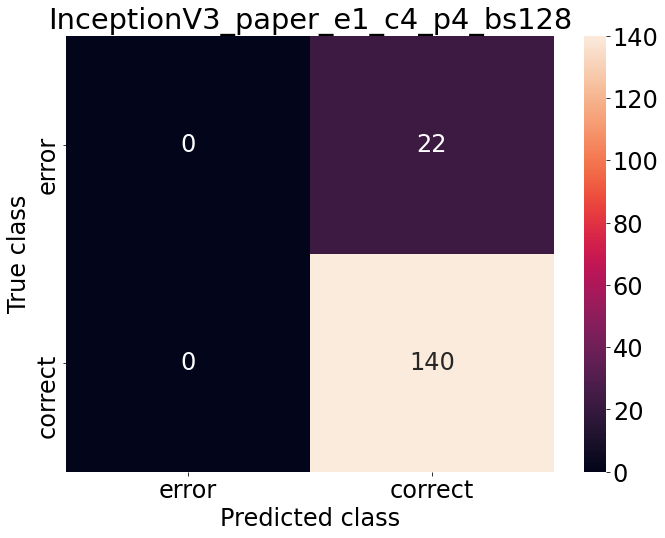

<Figure size 432x288 with 0 Axes>

In [38]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 24})
sns.heatmap(confusion_mtx, xticklabels=labels, yticklabels=labels,
            annot=True, fmt='g')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title(NAME)
plt.tight_layout()
plt.show()
plt.savefig(NAME+'.svg')  # , bbox_inches='tight', facecolor='w'

In [16]:
y_true = to_categorical(y_true,len(classes))
y_pred = to_categorical(y_pred,len(classes))

In [17]:
m = tf.keras.metrics.Accuracy()
m.update_state(y_true, y_pred)
print('Accuracy: ',m.result().numpy())

Accuracy:  0.86419755


In [18]:
m = tfa.metrics.F1Score(num_classes=len(classes), threshold=0.5)
m.update_state(y_true, y_pred)
print('F1Score',m.result().numpy())

F1Score [0.         0.92715234]


In [19]:
m = tf.keras.metrics.Precision()
m.update_state(y_true, y_pred)
print('Precision',m.result().numpy())

Precision 0.86419755


In [20]:
m = tf.keras.metrics.Recall()
m.update_state(y_true, y_pred)
print('Recall',m.result().numpy())

Recall 0.86419755


In [75]:
m = tf.keras.metrics.AUC()
m.update_state(y_true, y_pred)
print('AUC',m.result().numpy())

AUC 0.97004926
